# Homework 5

## Instructions

Some questions refer you to the [ISL textbook](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf). You may work with other students in the class to solve the problems but should write up your solutions separately.  Some textbook problem solutions are available on the internet.  You are welcome to look at these after attempting the problem yourself first, but please write up your solutions in your own words



## Conceptual Problems
Do problems 1 and 3 in Chapter 7.9.

##Penalized linear regression
Run a Lasso and Ridge (linear) regression on the numerical predictors in the auto data set with 3 fold cross validation.  Which method has a lower cross validation error?  Which predictors does the Lasso select?

The dataset is here (in pickle format): http://math.oit.edu/~overholserp/autos_cleaned.pkl

You may want to use the following tools:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html


# Exploring Penalized Splines via Simulation

Run the code below to simulate a training data set of n=41 observations of Y, given x in (0, 4) where $Y = x^4-3x^3-x^2+5x+3+\epsilon$ where $\epsilon$ is the irreducible error. We'll use splines to estimate $f(x) =  x^4-3x^3-x^2+5x+3$ shown in blue.

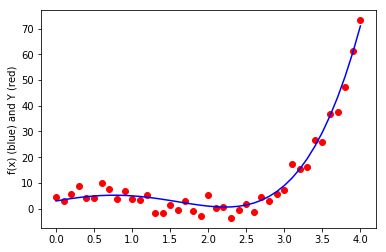

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(42)  # get the random numbers

x = np.arange(0, 4.1, 0.1) # the predictor
x.size
epsilon = np.random.normal(0, 3, x.size) # irreducible error
fx = x**4-3*x**3-x**2+5*x+3
Y = fx + epsilon

# view results

plt.plot(x, Y, "ro", x, fx, "b-")
plt.ylabel('f(x) (blue) and Y (red)')
plt.show()


In [ ]:
# cubic truncated power basis with K = 30 knots 

knots = np.linspace(0, 4, 30)


BB = np.stack((np.ones(x.size),x, x**2, x**3))
BB = BB.T

for i in range(0, knots.size-1):
    BB = np.concatenate((BB,np.resize(np.maximum(np.zeros(x.size),(x-knots[i])**3), [x.size,1])),axis=1)

In [ ]:
BB.shape

(41, 33)

The above code creates the cubic truncated power basis with 30 evenly space knots and stores it in matrix BB.  Write code below to compute $\beta = (BB^TBB+\lambda I)^{-1}BB^T Y$, the ridge regression solution to minimizing the mean squared training error with the squared coefficients penalized, with your choice of $\lambda$. Then compute $\hat{y} = BB \beta$.  Plot the true $f(x)$ together with your estimate.  Try a few other choices for $\lambda$, and choose the one that visually gives the best estimate.